In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import codecs
codecs.register_error("strict",codecs.ignore_errors)
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
import plotly
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

IMPORT CSV FILE

In [2]:
pcos_data= pd.read_csv(r"C:\Users\FAVOR\Documents\pcos_prediction_dataset.csv", sep=",",header=0)
pcos_data.head(50)

,Country,Age,BMI,Menstrual Regularity,Hirsutism,Acne Severity,Family History of PCOS,Insulin Resistance,Lifestyle Score,Stress Levels,Urban/Rural,Socioeconomic Status,Awareness of PCOS,Fertility Concerns,Undiagnosed PCOS Likelihood,Ethnicity,Diagnosis
0,Madagascar,26,Overweight,Regular,Yes,Severe,Yes,Yes,2,Low,Rural,High,Yes,No,0.107938,Hispanic,Yes
1,Vietnam,16,Underweight,Regular,Yes,NaN,No,Yes,4,High,Rural,Middle,Yes,No,0.156729,Other,No
2,Somalia,41,Normal,Regular,No,Moderate,No,No,7,Medium,Urban,Middle,Yes,Yes,0.202901,Other,No
3,Malawi,27,Normal,Irregular,No,Mild,No,No,10,Low,Urban,High,Yes,No,0.073926,Caucasian,Yes
4,France,26,Overweight,Irregular,Yes,NaN,No,No,7,Medium,Urban,Middle,No,No,0.229266,Caucasian,No
5,Rwanda,17,Overweight,Irregular,No,NaN,No,Yes,3,Low,Urban,High,Yes,Yes,0.209841,African,No
6,Rwanda,39,Obese,Regular,Yes,Mild,No,Yes,10,Medium,Urban,Low,No,Yes,0.208062,African,No
7,Tanzania,38,Normal,Regular,Yes,Mild,No,No,8,Medium,Rural,Middle,No,No,0.205957,Caucasian,No
8,United States,47,Normal,Regular,Yes,NaN,Yes,No,1,Medium,Urban,Low,Yes,No,0.103628,Asian,Yes
9,Italy,21,Underweight,Irregular,No,Mild,No,No,1,Medium,Rural,Low,Yes,No,0.102774,African,No


CHECK DATA INFORMATION

In [3]:
pcos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne Severity                59915 non-null   object 
 6   Family History of PCOS       120000 non-null  object 
 7   Insulin Resistance           120000 non-null  object 
 8   Lifestyle Score              120000 non-null  int64  
 9   Stress Levels                120000 non-null  object 
 10  Urban/Rural                  120000 non-null  object 
 11  Socioeconomic Status         120000 non-null  object 
 12  Awareness of PCOS            120000 non-null  object 
 13 

In [4]:
pcos_data.shape

(120000, 17)

In [5]:
pcos_data.describe(include='int').T

,count,mean,std,min,25%,50%,75%,max
Age,120000.0,31.980508,10.096799,15.0,23.0,32.0,41.0,49.0
Lifestyle Score,120000.0,5.506567,2.871052,1.0,3.0,6.0,8.0,10.0


In [6]:
pcos_data.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
Undiagnosed PCOS Likelihood,120000.0,0.149937,0.057786,0.050001,0.09982,0.149844,0.200061,0.249998


In [7]:
pcos_data.describe(include='object').T

,count,unique,top,freq
Country,120000,77,Burkina Faso,1667
BMI,120000,4,Normal,60080
Menstrual Regularity,120000,2,Regular,83941
Hirsutism,120000,2,No,72039
Acne Severity,59915,3,Mild,35822
Family History of PCOS,120000,2,No,84028
Insulin Resistance,120000,2,No,90183
Stress Levels,120000,3,Medium,59959
Urban/Rural,120000,2,Urban,83943
Socioeconomic Status,120000,3,Middle,59860


In [8]:
#check duplicated rows

pcos_data.duplicated().sum()

np.int64(0)

In [9]:
pcos_data.isnull().sum()

Country                            0
Age                                0
BMI                                0
Menstrual Regularity               0
Hirsutism                          0
Acne Severity                  60085
Family History of PCOS             0
Insulin Resistance                 0
Lifestyle Score                    0
Stress Levels                      0
Urban/Rural                        0
Socioeconomic Status               0
Awareness of PCOS                  0
Fertility Concerns                 0
Undiagnosed PCOS Likelihood        0
Ethnicity                          0
Diagnosis                          0
dtype: int64

FIND MISSING DATA

<Axes: >

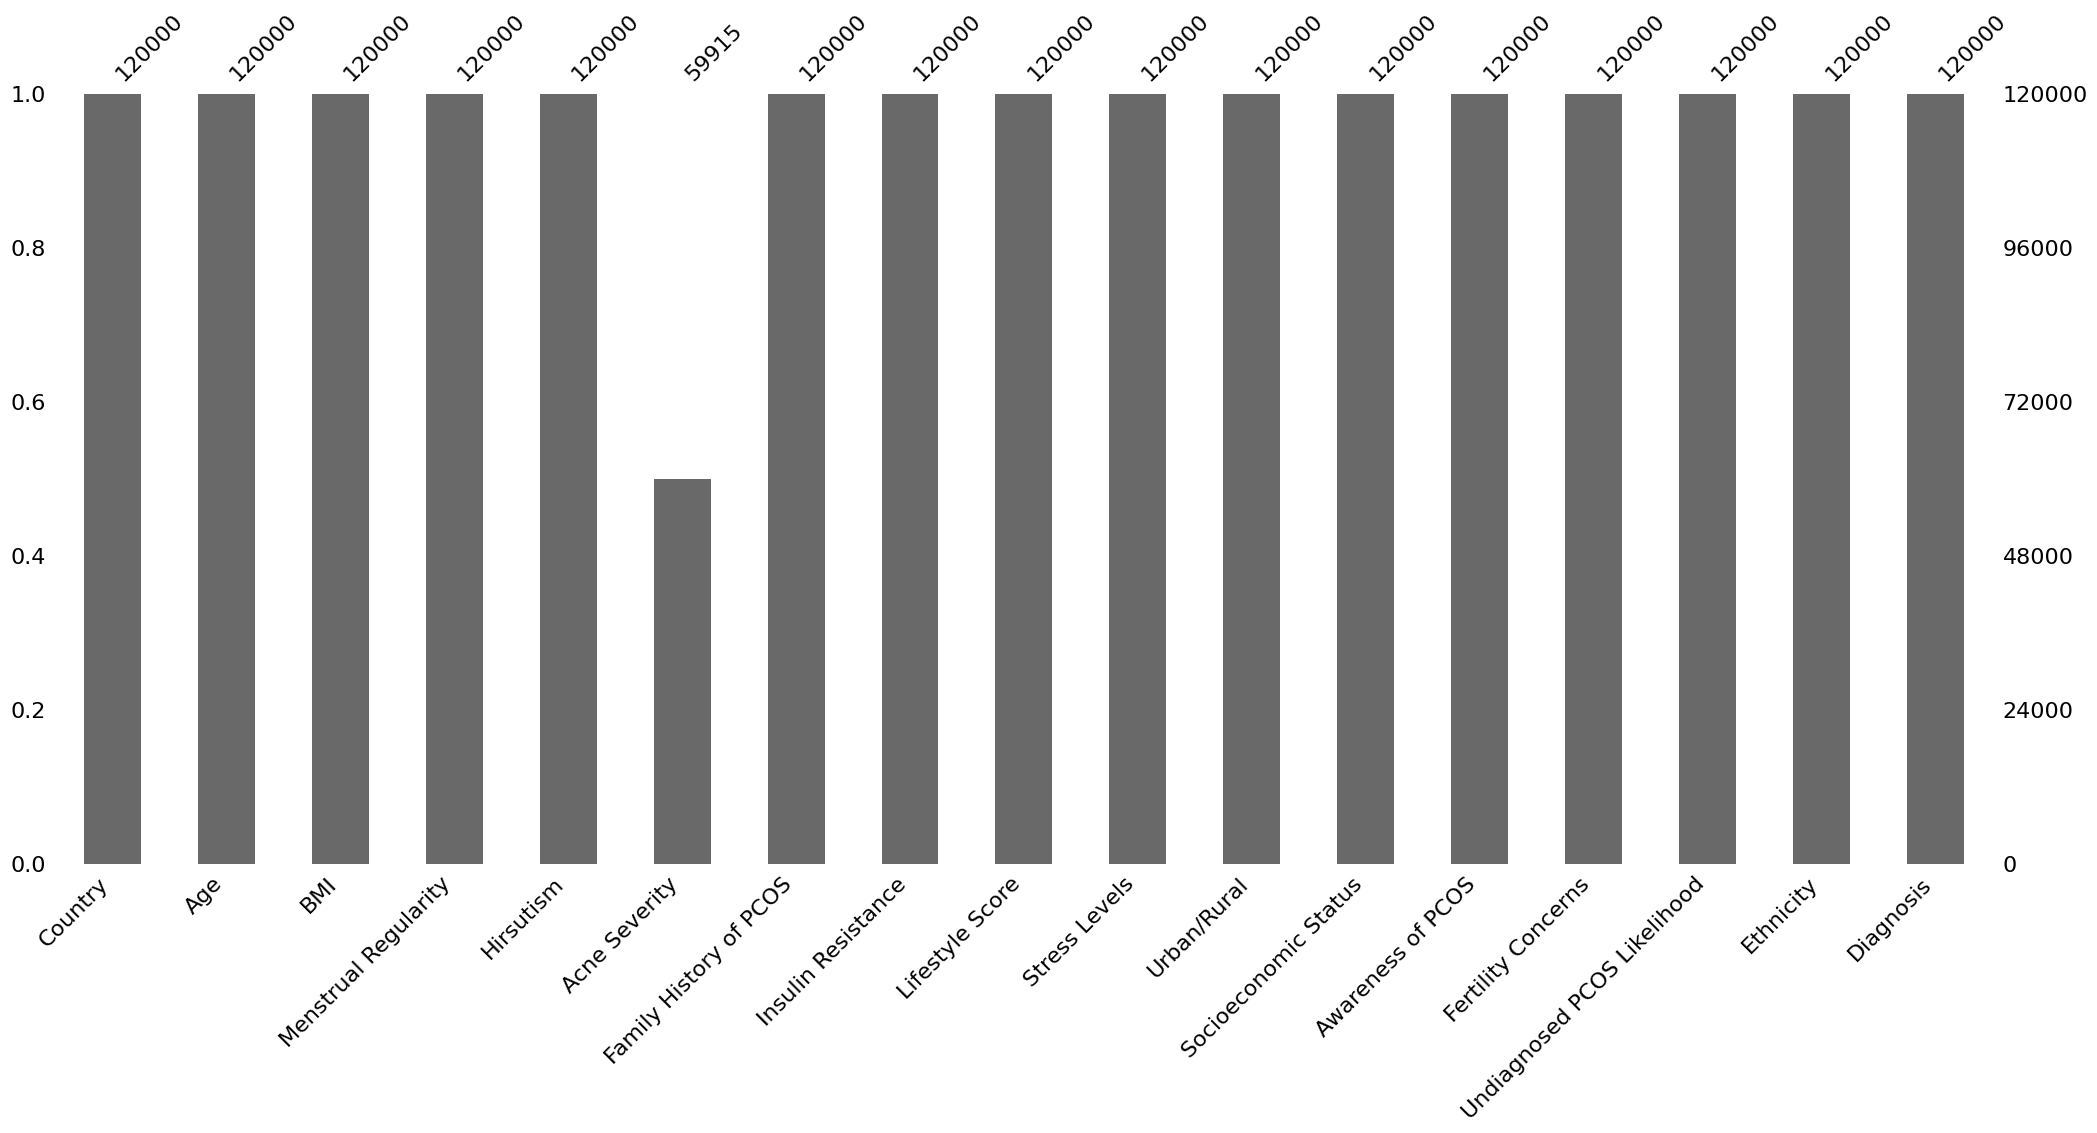

In [10]:
msno.bar(pcos_data)

In [11]:
#percentage of missing data

percentage_of_missing_data = ({'Percentage of missing data':pcos_data.isna().sum()/len(pcos_data)*100})
percentage_of_missing_data

{'Percentage of missing data': Country                         0.000000
 Age                             0.000000
 BMI                             0.000000
 Menstrual Regularity            0.000000
 Hirsutism                       0.000000
 Acne Severity                  50.070833
 Family History of PCOS          0.000000
 Insulin Resistance              0.000000
 Lifestyle Score                 0.000000
 Stress Levels                   0.000000
 Urban/Rural                     0.000000
 Socioeconomic Status            0.000000
 Awareness of PCOS               0.000000
 Fertility Concerns              0.000000
 Undiagnosed PCOS Likelihood     0.000000
 Ethnicity                       0.000000
 Diagnosis                       0.000000
 dtype: float64}

DROP COLUMN

In [12]:
pcos_data.drop(columns='Acne Severity', inplace=True)

In [13]:
pcos_data.columns

Index(['Country', 'Age', 'BMI', 'Menstrual Regularity', 'Hirsutism',
       'Family History of PCOS', 'Insulin Resistance', 'Lifestyle Score',
       'Stress Levels', 'Urban/Rural', 'Socioeconomic Status',
       'Awareness of PCOS', 'Fertility Concerns',
       'Undiagnosed PCOS Likelihood', 'Ethnicity', 'Diagnosis'],
      dtype='object')

ENCODE CATEGORICAL VARIABLES ONE-HOT ENCODING

In [14]:
pcos_data = pd.get_dummies(pcos_data, columns=['Country', 'Menstrual Regularity', 'Hirsutism', 
    'Family History of PCOS', 'Urban/Rural', 
    'Socioeconomic Status', 'Awareness of PCOS', 
    'Fertility Concerns', 'Ethnicity'], drop_first=True)

MAPPING TO CONVERT STRINGS TO NUMERIC

In [15]:
# mapping for both BMI and Stress Levels columns(to adjust actual unique values)
bmi_map = {
    'Normal': 0,
    'Underweight': 1,
    'Overweight': 2,
    'Obese': 3
}

In [16]:
stress_map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

APPLY THE MAPPING TO THE RESPECTIVE COLUMNS

In [17]:
pcos_data['BMI'] = pcos_data['BMI'].map(bmi_map)
pcos_data['Stress Levels'] = pcos_data['Stress Levels'].map(stress_map)

pcos_data[['BMI', 'Stress Levels']].head(60)

,BMI,Stress Levels
0,2,0
1,1,2
2,0,1
3,0,0
4,2,1
5,2,0
6,3,1
7,0,1
8,0,1
9,1,1


In [20]:
# If there are any NaN values after mapping, we can fill them with the median or mode (depending on your preference)
pcos_data['BMI'].fillna(pcos_data['BMI'].median(), inplace=True)
pcos_data['Stress Levels'].fillna(pcos_data['Stress Levels'].median(), inplace=True)


VERIFY THE DATA TYPES OF BMI AND STRESS

In [21]:
pcos_data[['BMI', 'Stress Levels']].dtypes

BMI              int64
Stress Levels    int64
dtype: object

In [22]:
# Initialize LabelEncoder
le = LabelEncoder()

# Convert binary/categorical columns to numeric values
pcos_data['Undiagnosed PCOS Likelihood'] = le.fit_transform(pcos_data['Undiagnosed PCOS Likelihood'])
pcos_data['Insulin Resistance'] = le.fit_transform(pcos_data['Insulin Resistance'])
pcos_data['Diagnosis'] = le.fit_transform(pcos_data['Diagnosis'])


In [23]:
pcos_data.dtypes

Age                       float64
BMI                         int64
Insulin Resistance          int64
Lifestyle Score           float64
Stress Levels               int64
                           ...   
Fertility Concerns_Yes       bool
Ethnicity_Asian              bool
Ethnicity_Caucasian          bool
Ethnicity_Hispanic           bool
Ethnicity_Other              bool
Length: 95, dtype: object

STANDARDIZE NUMERICAL FEATURES

In [25]:
scaler = StandardScaler()
pcos_data[['Age','BMI', 'Stress Levels','Lifestyle Score']] = scaler.fit_transform(pcos_data[['Age', 'BMI', 'Stress Levels', 'Lifestyle Score']])


DEFINE FEATURES AND TARGET VARIABLE

In [29]:
X = pcos_data.drop(['Diagnosis'], axis=1)
y = pcos_data['Diagnosis']


SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

TRAIN A PREDICTION MODEL

In [31]:
model_predict = RandomForestClassifier(n_estimators=100, random_state=42)
model_predict.fit(X_train, y_train)

y_pred= model_predict.predict(X_test)

CLASSIFICATION REPORT AND CONFUSION MATRIX

In [32]:
classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

VISUALIZE THE RESULTS:

Feature Importance

In [35]:
feature_importances = model_predict.feature_importances_
features = X.columns
importance_pcos = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_pcos = importance_df.sort_values(by='Importance', ascending=False)


Plot Feature Importance

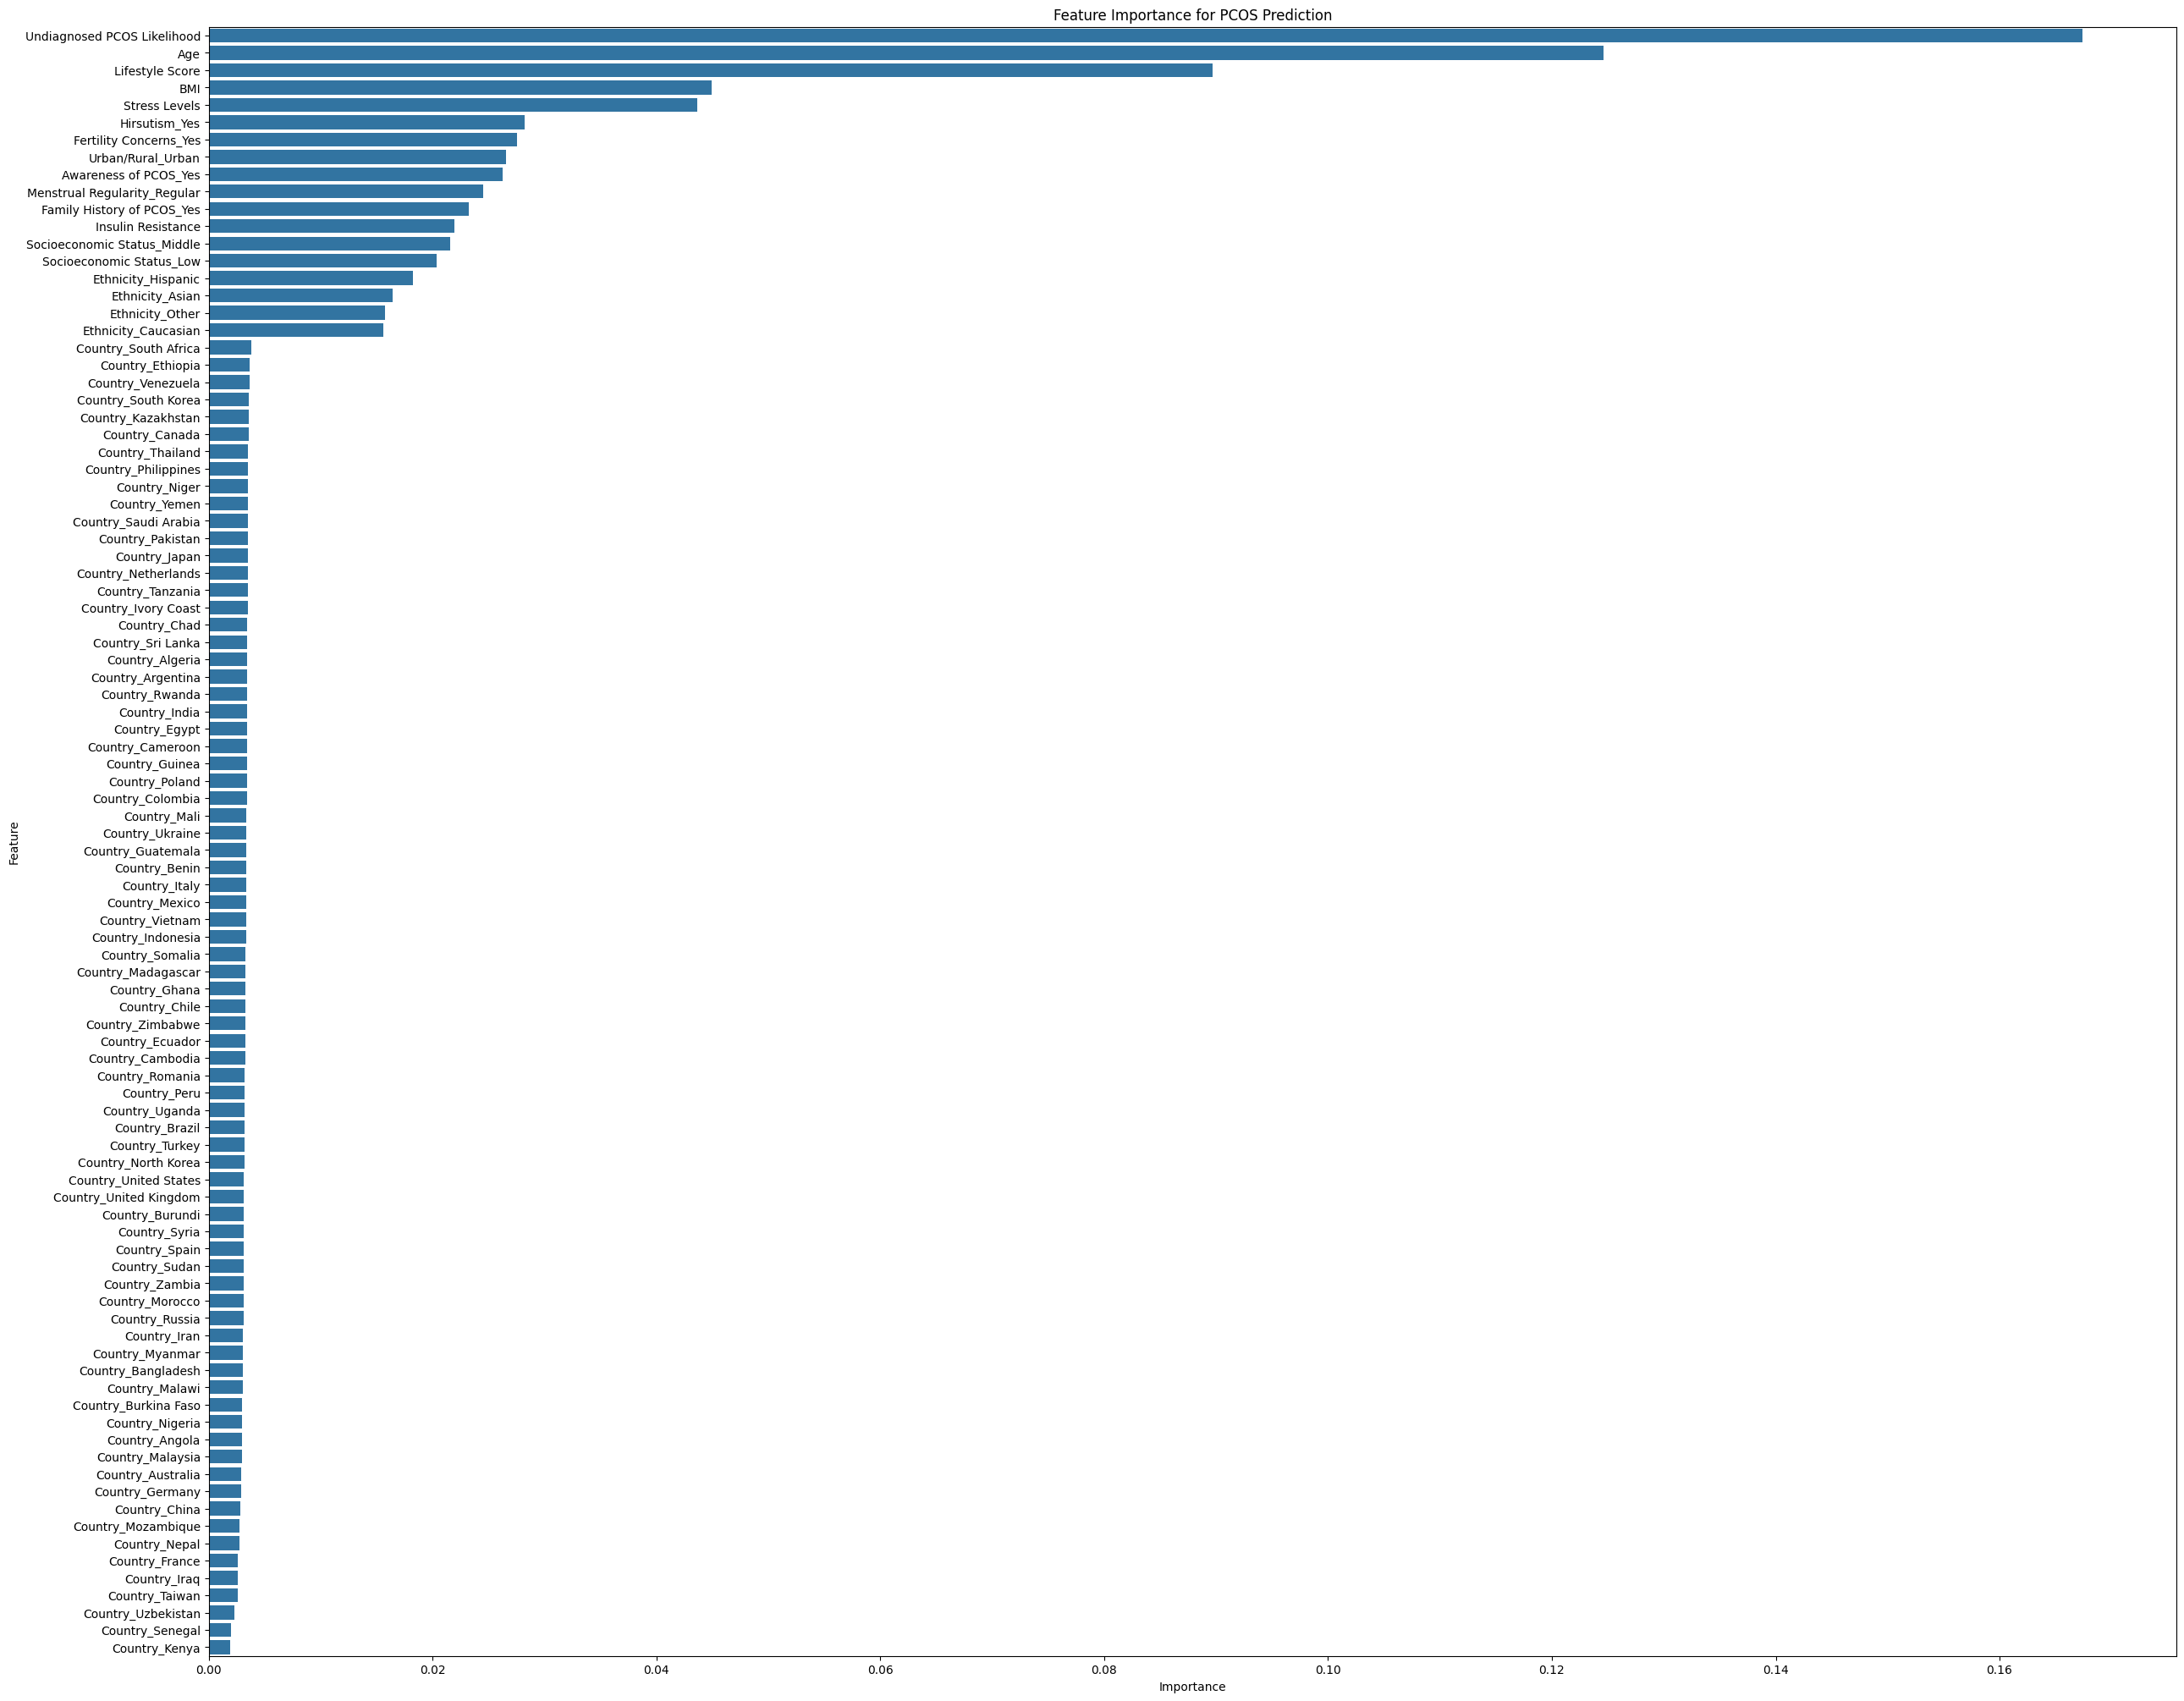

In [38]:
plt.figure(figsize=(30, 25))
sns.barplot(x='Importance', y='Feature', data=importance_pcos)
plt.title('Feature Importance for PCOS Prediction')
plt.show()


 Visualizing distribution of Age and BMI

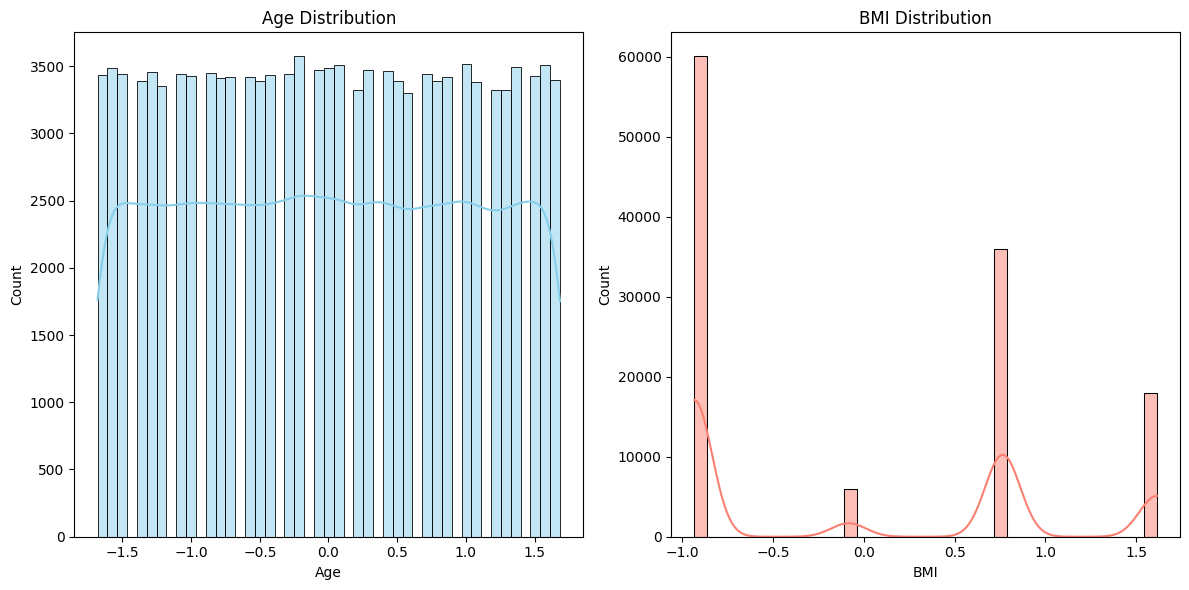

In [43]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(pcos_data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(pcos_data['BMI'], kde=True, color='salmon')
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()


CONFUSION MATRIX VISUALIZATION

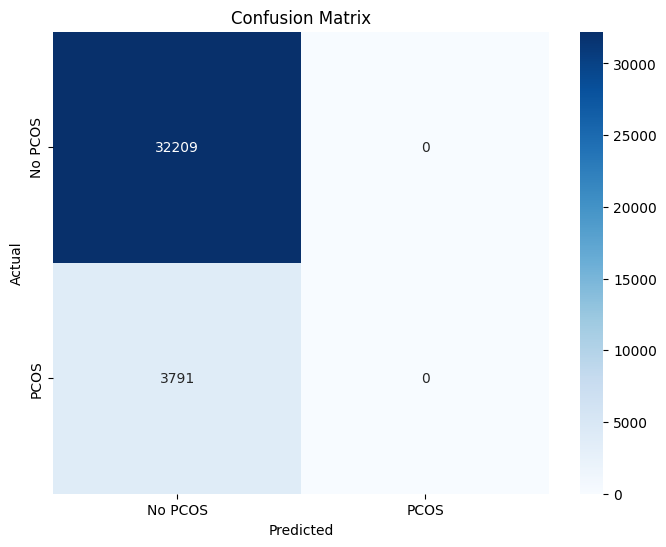

In [39]:
confused_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confused_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No PCOS', 'PCOS'], yticklabels=['No PCOS', 'PCOS'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


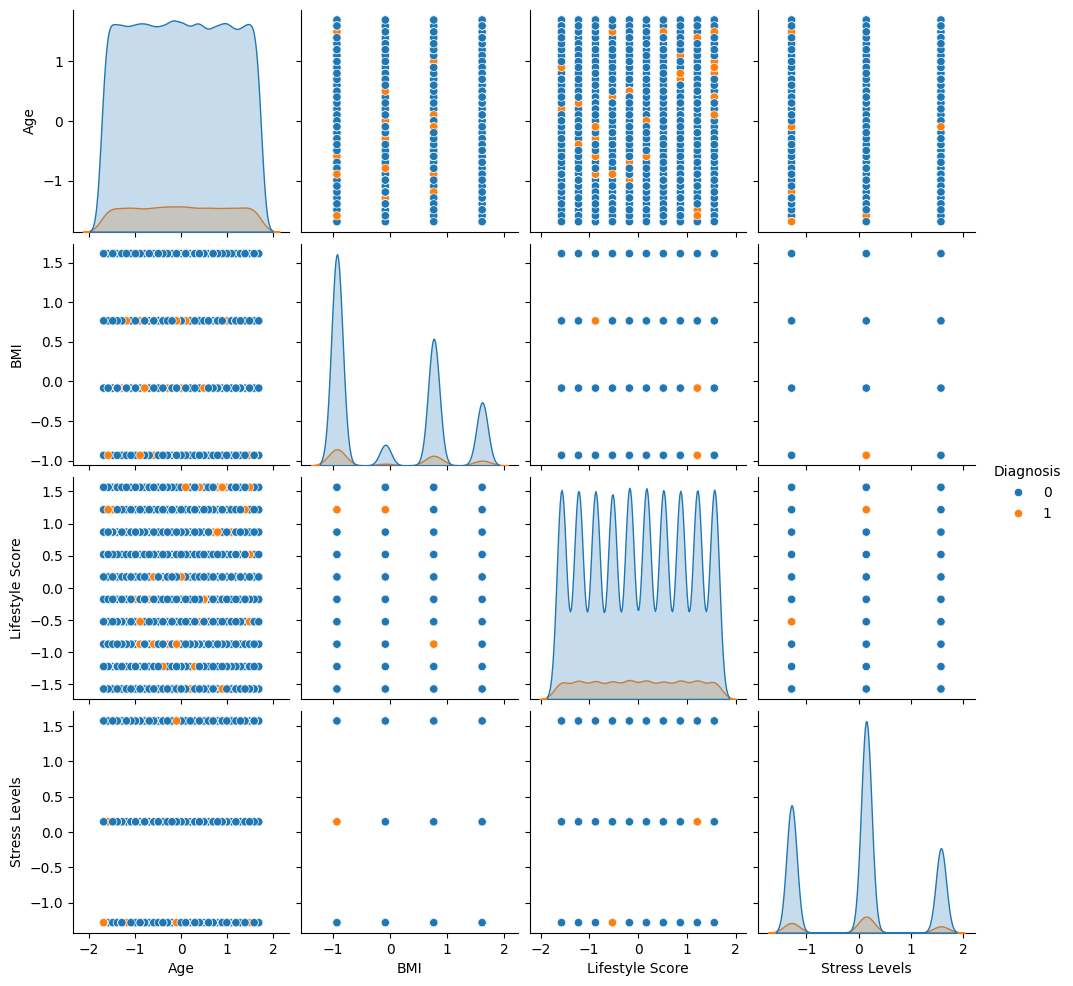

In [42]:
sns.pairplot(pcos_data[['Age', 'BMI', 'Lifestyle Score', 'Stress Levels', 'Diagnosis']], hue='Diagnosis')
plt.show()


CORRELATION HEATMAP

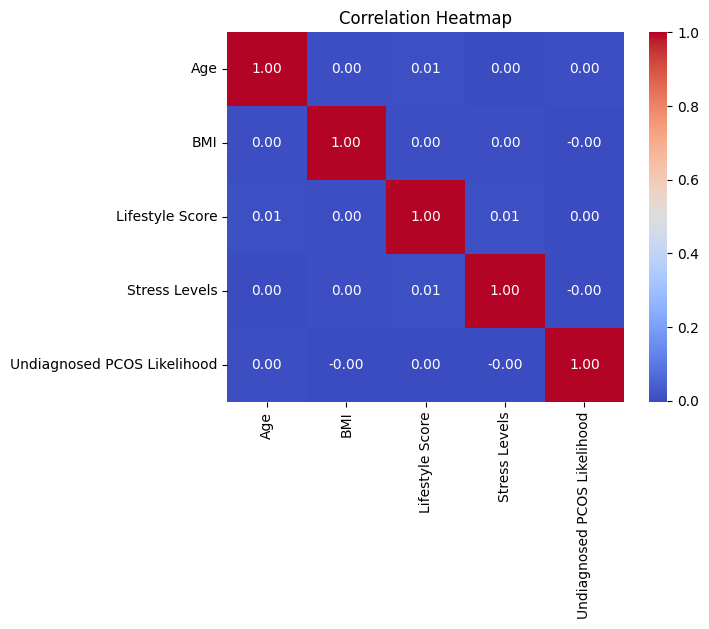

In [44]:
correlation = pcos_data[['Age', 'BMI', 'Lifestyle Score', 'Stress Levels', 'Undiagnosed PCOS Likelihood']].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
